In [158]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils.np_utils import to_categorical
from keras import metrics

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [159]:
# Download mnist dataset
(X_train, y_train), (X_test, y_test)  = mnist.load_data()
print("Train data : {}".format(X_train.shape))
print("Test data : {}".format(X_test.shape))

Train data : (60000, 28, 28)
Test data : (10000, 28, 28)


- 60000 - number of training examples
- 10000 - number of test examples
- (28,28) - image size

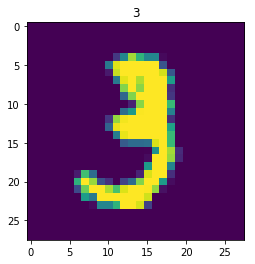

In [160]:
# Visualize
plt.imshow(X_train[10])
plt.title(y_train[10]);

In [161]:
# Normalize Data
X_train = X_train/255.
X_test = X_test/255.

In [162]:
# Data Reshape - append number of channels
n_train, h, w = X_train.shape
n_test = X_test.shape[0]

X_train = X_train.reshape(n_train, h * w)
X_test = X_test.reshape(n_test, h * w)

In [163]:
# One hot encoding for label
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [164]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_shape= (784,),  activation="softmax"))
    return model

In [165]:
# Create model and look at the architecture
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [166]:
# Training parameters
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[metrics.categorical_accuracy])

In [167]:
# Fit 
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs);

Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.6869 - categorical_accuracy: 0.8291
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.3621 - categorical_accuracy: 0.9023
Epoch 3/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.3193 - categorical_accuracy: 0.9122
Epoch 4/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.2993 - categorical_accuracy: 0.9165
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2876 - categorical_accuracy: 0.9198
Epoch 6/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2796 - categorical_accuracy: 0.9220
Epoch 7/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.2739 - categorical_accuracy: 0.9242
Epoch 8/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.2690 - categorical_accuracy: 0.9252
Epoch 9/10
60000/60000 [==============================] - 1s 13u

In [168]:
history.params

{'batch_size': 128,
 'do_validation': False,
 'epochs': 10,
 'metrics': ['loss', 'categorical_accuracy'],
 'samples': 60000,
 'steps': None,
 'verbose': 1}

In [171]:
loss_history = history.history["loss"]
acc_history = history.history["categorical_accuracy"]

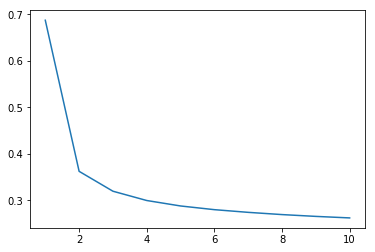

In [173]:
# Loss visualization
plt.plot(range(1, epochs + 1), loss_history);

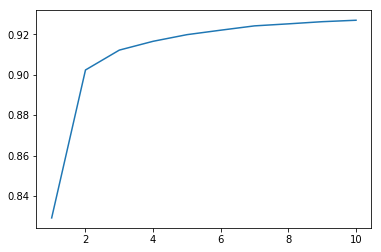

In [175]:
# Accuracy visualization
plt.plot(range(1, epochs + 1), acc_history);

In [177]:
# Let's evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss: {}".format(test_loss))
print("Test accuracy: {}".format(test_accuracy))

10000/10000 [==============================] - 0s 20us/step
Test loss: 0.268340193865
Test accuracy: 0.9252


In [181]:
# Save  model

model.save_weights("weights.json")
model.save("model.hd5")

In [182]:
! ls

model.hd5  NN.ipynb  README.md	weights.json


You can see the file with weights and file with model architecture